In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes(as_frame=True, scaled=False)

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
X = data['data']
y = data['target']
df = data['frame']

In [7]:
X.shape, y.shape

((442, 10), (442,))

In [10]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [18]:
!pip install dataprep

^C


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
      running egg_info
      writing levenshtein.egg-info\PKG-INFO
      writing dependency_links to levenshtein.egg-info\dependency_links.txt
      deleting levenshtein.egg-info\entry_points.txt
      writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
      writing requirements to levenshtein.egg-info\requires.txt
      writing top-level names to levenshtein.egg-info\top_level.txt
      reading manifest file 'levenshtein.egg-info\SOURCES.txt'
      reading m

  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached aiohttp-3.10.5-cp312-cp312-win_amd64.whl.metadata (7.8 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached Bottleneck-1.4.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.4-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.6.1-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Metaphone-0.6-py3-none-any.whl
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadat

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [44]:
model = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)

In [45]:
X_aug = poly.fit_transform(X)
model.fit(X_aug, y)


LinearRegression()

In [46]:
y_pred = model.predict(X_aug)

In [25]:
print(f'{model.intercept_:.2f}')
for name, value in zip(data['feature_names'], model.coef_):
    print(f'{name}: {value:.2f}')


-334.57
age: -0.04
sex: -22.86
bmi: 5.60
bp: 1.12
s1: -1.09
s2: 0.75
s3: 0.37
s4: 6.53
s5: 68.48
s6: 0.28


In [47]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y, y_pred)

np.float64(49.160779665267526)

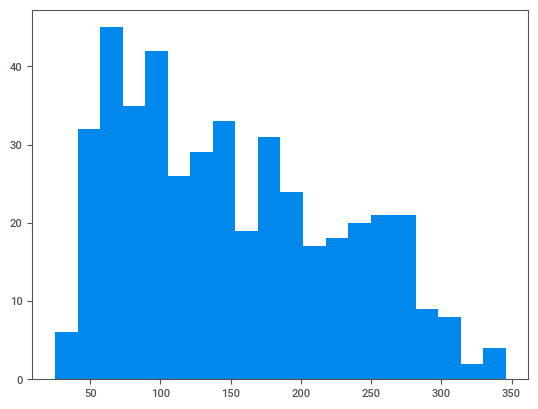

In [30]:
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.show()

In [34]:
import numpy as np

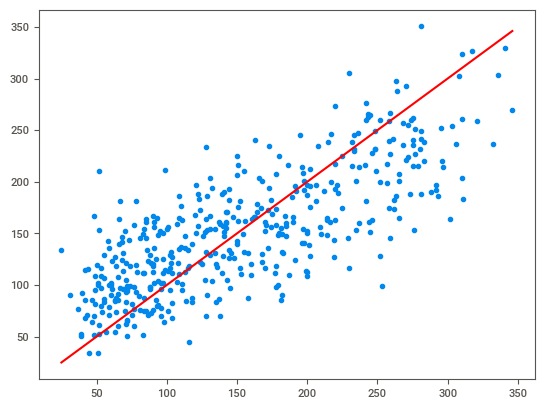

In [48]:
x_aux = np.linspace(y.min(), y.max(), 100)
y_aux = x_aux
plt.figure()
plt.scatter(y, y_pred)
plt.plot(x_aux, y_aux, color='red')
plt.show()